In [1]:
#1.Aufgabe
import numpy as np
import cv2 as cv
import cv2 as cv2
from matplotlib import pyplot as plt
from scipy import misc
from scipy.spatial import distance as dist
from imutils import perspective, contours
import imutils
#from google.colab.patches import cv2_imshow

In [2]:
def show2images(img1, img2, cmap1, cmap2):
    figure, img_array = plt.subplots(1,2, figsize = (40,40))
    img_array[0].imshow(img1, cmap1)
    img_array[1].imshow(img2, cmap2)

In [3]:
def cropimage(imgpath):
 img = cv2.imread(imgpath)
 h, w, channels = img.shape
 half = w//2
 left_part = img[:, :half] 
 right_part = img[:, half:]   
 cv2.imwrite('right.jpg', right_part)
 cv2.imwrite('left.jpg', left_part)

In [4]:
def getcnthull(mask_img): #to create a shell/hull that surrounds the shape
    contours2, hierarchy = cv.findContours(mask_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    contours2 = max(contours2, key=lambda x: cv.contourArea(x))
    hull = cv.convexHull(contours2)
    return contours2, hull

def getdefects(contours2): #gaps between shell/hull and shape itself
    hull = cv.convexHull(contours2, returnPoints=False)
    defects = cv.convexityDefects(contours2, hull)
    return defects

Die Anzahl der Finger : 5


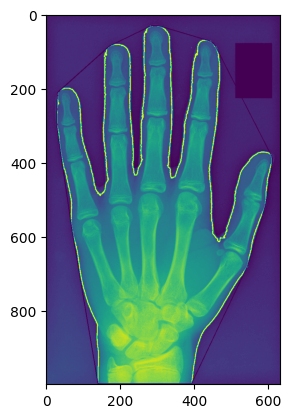

In [5]:
def calculateangle(cnt, defects): #this function is used for calculating angles
 if defects is not None:   
  for i in range(defects.shape[0]):  
    start = tuple(contours2[defects[i][0][0]][0])
    end = tuple(contours2[defects[i][0][1]][0])
    far = tuple(contours2[defects[i][0][2]][0])
    a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
    b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
    c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
    angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  # Cosine theorem is being used here to calculate angles between fingers 
    if angle <= np.pi / 2:  # if angle less than 90 degrees, it is a finger
     cnt += 1
 return cnt       

def countfinger(img):
 cv.drawContours(img, [contours2], -1, (255,255,0), 2)
 cv.drawContours(img, [hull], -1, (0, 255, 255), 2)
 defects = getdefects(contours2)
 cnt = calculateangle(0, defects)
 return cnt,img

original_img = cv2.imread("roentgen.tif", 0)
#original_img = cv2.imread("Testbild3 (1).jpg", 0)
#original_img = cv2.imread("Testbild_Roentgen2.jpg", 0) 
img = original_img.copy()

ret, threshold = cv2.threshold(img,45, 255, cv2.THRESH_BINARY)
contours2, hull = getcnthull(threshold)

if(len(contours2) > 2900 and len(contours2) < 5000):
 cropimage("Testbild_Roentgen2.jpg") 
 right_part = cv2.imread("right.jpg", 0)
 ret, threshold = cv2.threshold(right_part,55, 255, cv2.THRESH_BINARY)
 contours2, hull = getcnthull(threshold)
 rightfingers,right_part = countfinger(right_part)

 left_part = cv2.imread("left.jpg", 0)
 ret, threshold1 = cv2.threshold(left_part,55, 255, cv2.THRESH_BINARY)
 contours2, hull = getcnthull(threshold1)
 leftfingers, left_part = countfinger(left_part)

 show2images(right_part, left_part, None,None)
 print("Die Anzahl der Finger : " +  str(rightfingers + leftfingers + 2))   

else: 
 cnt, result_img = countfinger(img)
 print("Die Anzahl der Finger : " +  str(cnt + 1))
 plt.imshow(result_img)


The code in this link was used to understand the cosine theorem for calculating number of fingers: https://stackoverflow.com/questions/57525324/how-to-detect-number-of-fingers-and-add-double-digits-using-opencv